In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaelanietie/endometriosis-dataset")

print("Path to dataset files:", path)


100%|██████████| 207k/207k [00:00<00:00, 52.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/michaelanietie/endometriosis-dataset/versions/1


In [65]:
# predict if someone has the condition (e.g., endometriosis) based on their symptoms and other health indicators?
# libriaes imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
# checking dataset for understating
df = pd.read_csv("endo_data.csv")
df.head()
df.info()
print(df.shape)

# data cleaning - non-visually
# check for null vales
df.isnull().sum()
# drop any null values
df.dropna(inplace=True)
df.isnull().sum()
print(df.shape)

# check for duplicate values
df.duplicated().sum()
# drop any duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()
print(df.shape)

#check the data type
print(df.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB
(10000, 7)
(10000, 7)
(10000, 7)
Age                            int64
Menstrual_Irregularity         int64
Chronic_Pain_Level           float64
Hormone_Level_Abnormality      int64
Infertility                    int64
BMI                          float64
Diagnosis                      int64
dtype: object


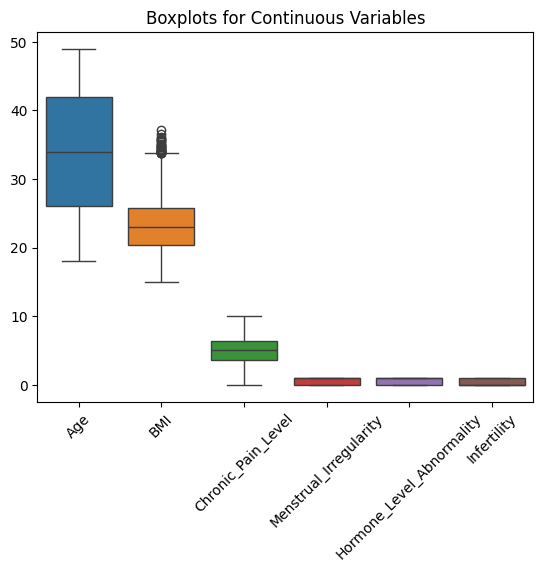

Diagnosis
0    0.5921
1    0.4079
Name: proportion, dtype: float64


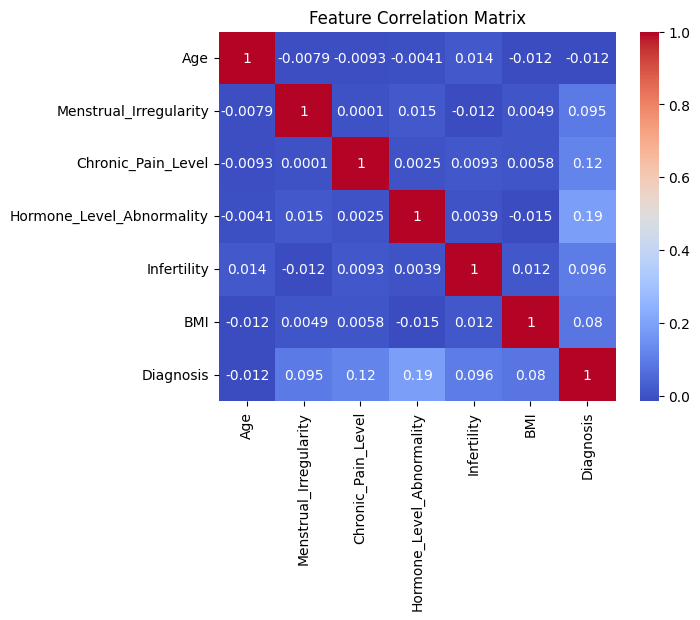

In [66]:
# Additional data cleaning
# checking for outliners
sns.boxplot(data=df[['Age', 'BMI', 'Chronic_Pain_Level','Menstrual_Irregularity','Hormone_Level_Abnormality','Infertility']])
plt.xticks(rotation=45)
plt.title("Boxplots for Continuous Variables")
plt.show()

# featuer scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'BMI', 'Chronic_Pain_Level','Menstrual_Irregularity','Hormone_Level_Abnormality','Infertility']])

# checking if classes are balanced
print(df['Diagnosis'].value_counts(normalize=True))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



............................................................
Accuracy: 0.635
Cross-Validation RMSE Scores testing data: [0.675 0.6   0.66  0.67  0.68  0.61  0.635 0.59  0.675 0.65 ]
Mean Cross-Validation RMSE testing data: 0.6445000000000001
Precision: 0.55
Recall: 0.37
F1-Score: 0.44
............................................................
 
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73      1220
           1       0.55      0.37      0.44       780

    accuracy                           0.64      2000
   macro avg       0.61      0.59      0.58      2000
weighted avg       0.62      0.64      0.62      2000

............................................................
 
confusion matrix
[[0.8057377  0.1942623 ]
 [0.63205128 0.36794872]]


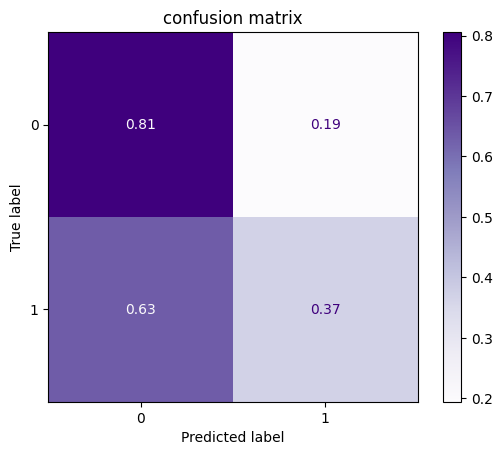

............................................................

ROC AUC Score: 0.5868432114333754


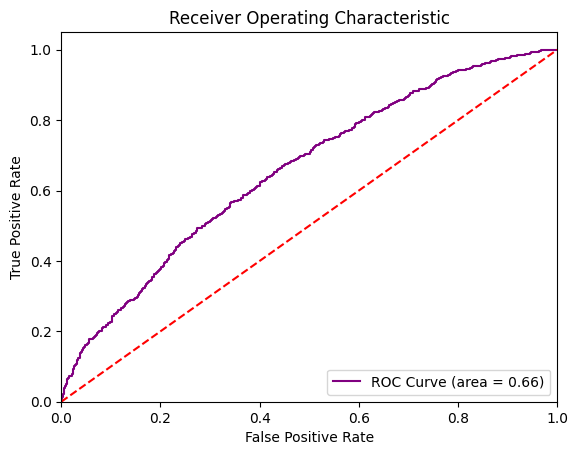

............................................................



In [71]:
# splitting fetauers into targets(y- diagonsis) and featuers(x)
 # Features- age, menstral_irregularity, Chronic_pain_levels,hormone_level_abnormaility, Infertility & BMI
X = df.drop('Diagnosis', axis=1)
# Target variable - Diagnosis
y = df['Diagnosis']
#creating training and testing data #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating first model: Logistic Regession modle and evaluating using confusion metrics/ accuracy classification report and ROC
# Initialize and fit the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluate the model

print("............................................................")
#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
cv_scores = cross_val_score(model, X_test, y_test, cv=10,scoring='accuracy')
print("Cross-Validation RMSE Scores testing data:",cv_scores )
print("Mean Cross-Validation RMSE testing data:", np.mean(cv_scores))
#precision
precision = precision_score(y_test,y_pred)
print(f"Precision: {precision:.2f}")
#recall score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

print("............................................................")
print(" ")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("............................................................")
print(" ")
from sklearn.metrics import ConfusionMatrixDisplay
#for test data
titles_options = [
    ("confusion matrix", 'true')
]
for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          model,
          X_test,
          y_test,
          display_labels= model.classes_,
          cmap=plt.cm.Purples,
          normalize=normalize,)
      disp.ax_.set_title(title)
      print(title)
      print(disp.confusion_matrix)
plt.show()

print("............................................................")
print("")
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='purple', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print("............................................................")
print("")